# **House Price Predictor using Linear Regression Model**

## Import All the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

## Working on Train dataframe

In [3]:
traindf = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\train.csv")

In [4]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
numeric_df = traindf.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
req_tr = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [7]:
selected_tr = traindf[req_tr]

In [8]:
selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) + 
                                    selected_tr['BsmtHalfBath'].fillna(0) + 
                                    selected_tr['FullBath'].fillna(0) + 
                                    selected_tr['HalfBath'].fillna(0))

selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) + 
                                  selected_tr['1stFlrSF'].fillna(0) + 
                                  selected_tr['2ndFlrSF'].fillna(0) + 
                                  selected_tr['LowQualFinSF'].fillna(0) + 
                                  selected_tr['GrLivArea'].fillna(0))


C:\Users\DELL\AppData\Local\Temp\ipykernel_25564\2208519363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
C:\Users\DELL\AppData\Local\Temp\ipykernel_25564\2208519363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +


In [9]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,5688
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3234


## Keeping only the necessary columns

In [10]:
train_df = selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]

In [11]:
train_df

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,8,4,548,4276,7,208500
1,6,3,460,3786,6,181500
2,6,4,608,4492,7,223500
3,7,2,642,4190,7,140000
4,9,4,836,5541,8,250000
...,...,...,...,...,...,...
1455,7,3,460,4247,6,175000
1456,7,3,500,5688,6,210000
1457,9,2,252,5832,7,266500
1458,5,2,240,3234,5,142125


## Splitting the dataset and Creating Pipeline

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(train_df,test_size = 0.2,random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 1168
Rows in test set:292



In [13]:
housing = train_set.drop("SalePrice",axis=1)
housing_labels = train_set["SalePrice"].copy()

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [15]:
X_train = my_pipeline.fit_transform(housing)

In [16]:
X_train

array([[-0.96456591, -0.48377079, -0.86383727, -0.13352109, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.13428593, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.32207838, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -1.16605156, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.26966215,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.28025593,  0.64257719]])

In [17]:
Y_train = housing_labels

In [18]:
Y_train.shape

(1168,)

## Correlations

In [46]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
train_df.columns

Index(['TotRmsAbvGrd', 'TotalBath', 'GarageArea', 'TotalSF', 'OverallQual',
       'SalePrice'],
      dtype='object')

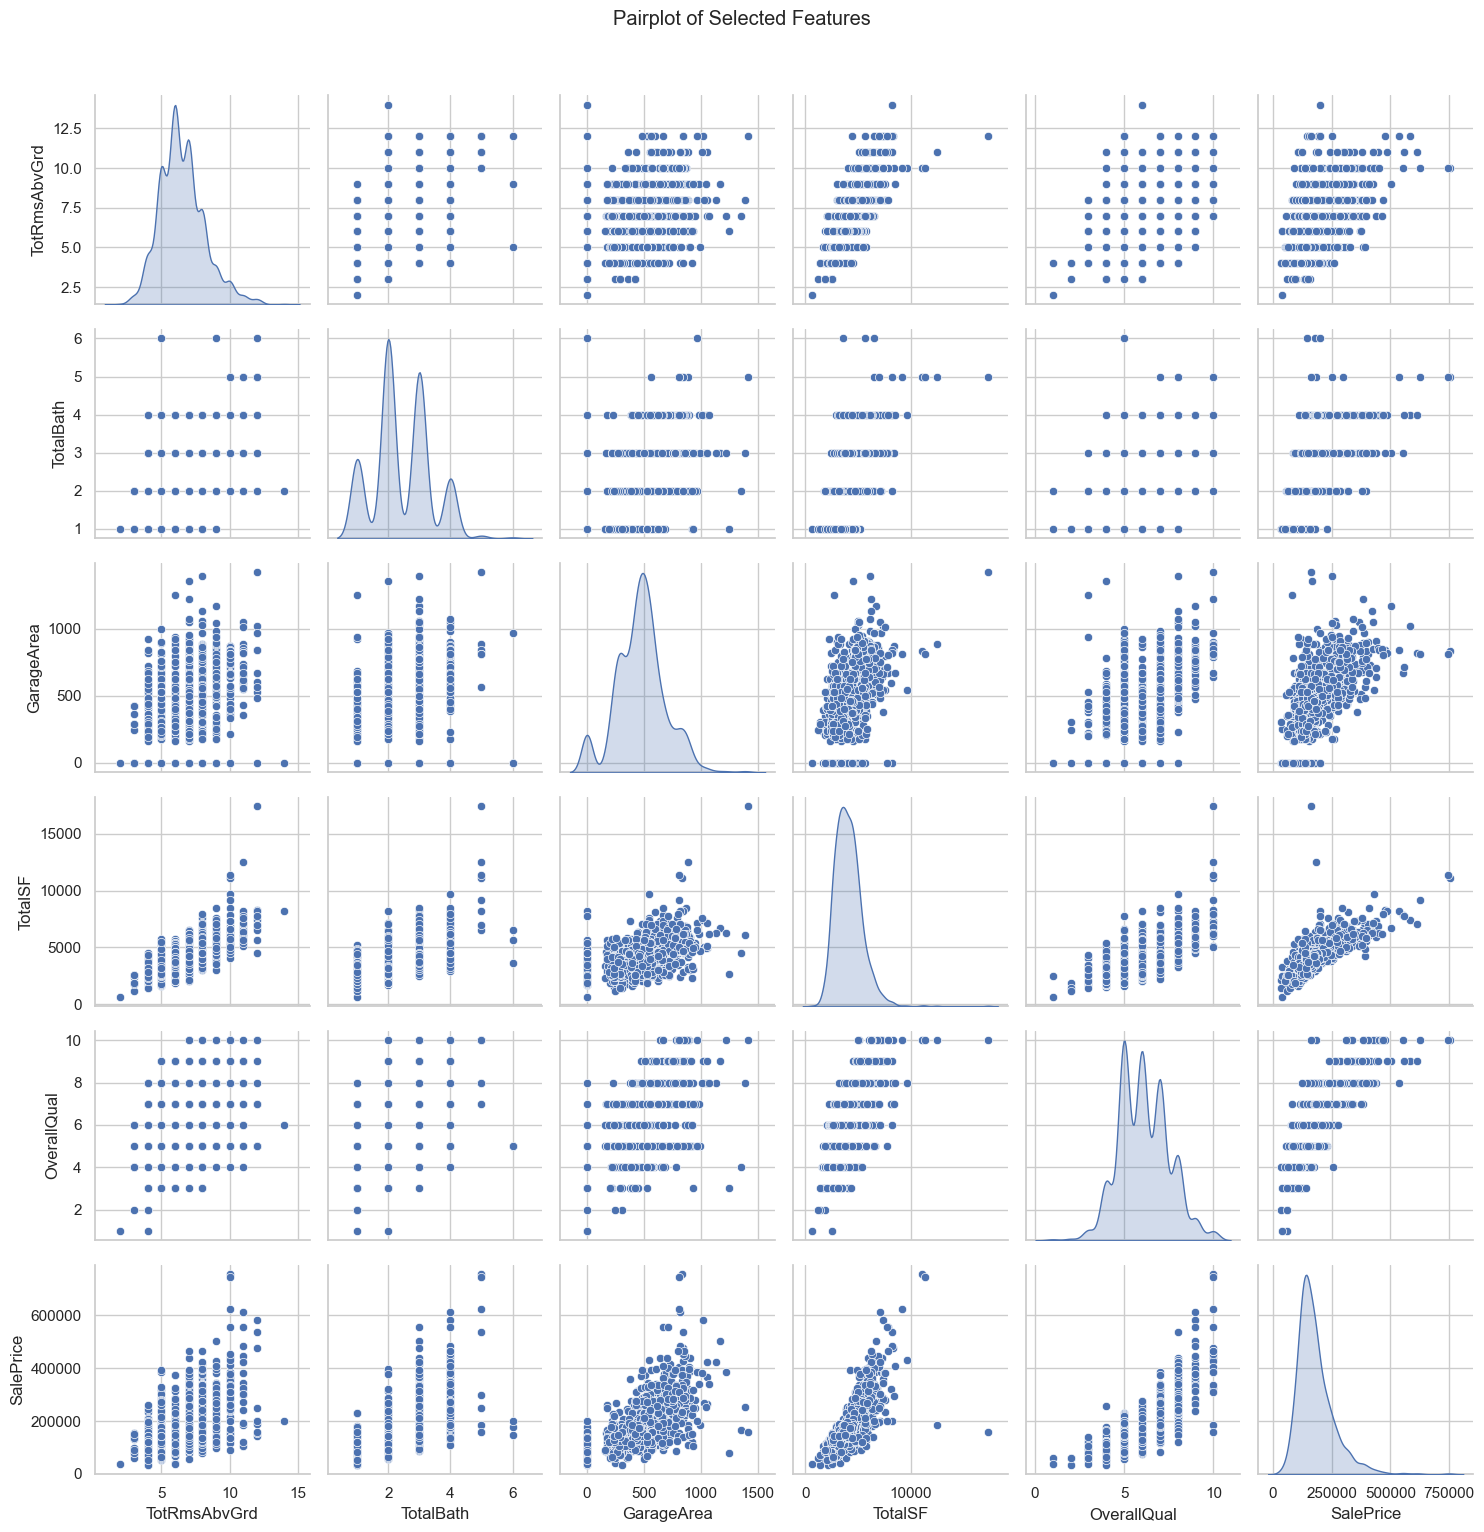

In [51]:
# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set Seaborn style
sns.set(style="whitegrid")

# Select relevant features based on the available columns
selected_features = ['TotRmsAbvGrd', 'TotalBath', 'GarageArea', 'TotalSF', 'OverallQual', 'SalePrice']

# Create pairplot with customized aesthetics
pairplot = sns.pairplot(train_df[selected_features], diag_kind='kde', markers='o', palette='viridis')

# Add a title to the pairplot
pairplot.fig.suptitle("Pairplot of Selected Features", y=1.02)

# Adjust the layout to fit the title
plt.tight_layout()

# Display the plot
plt.show()

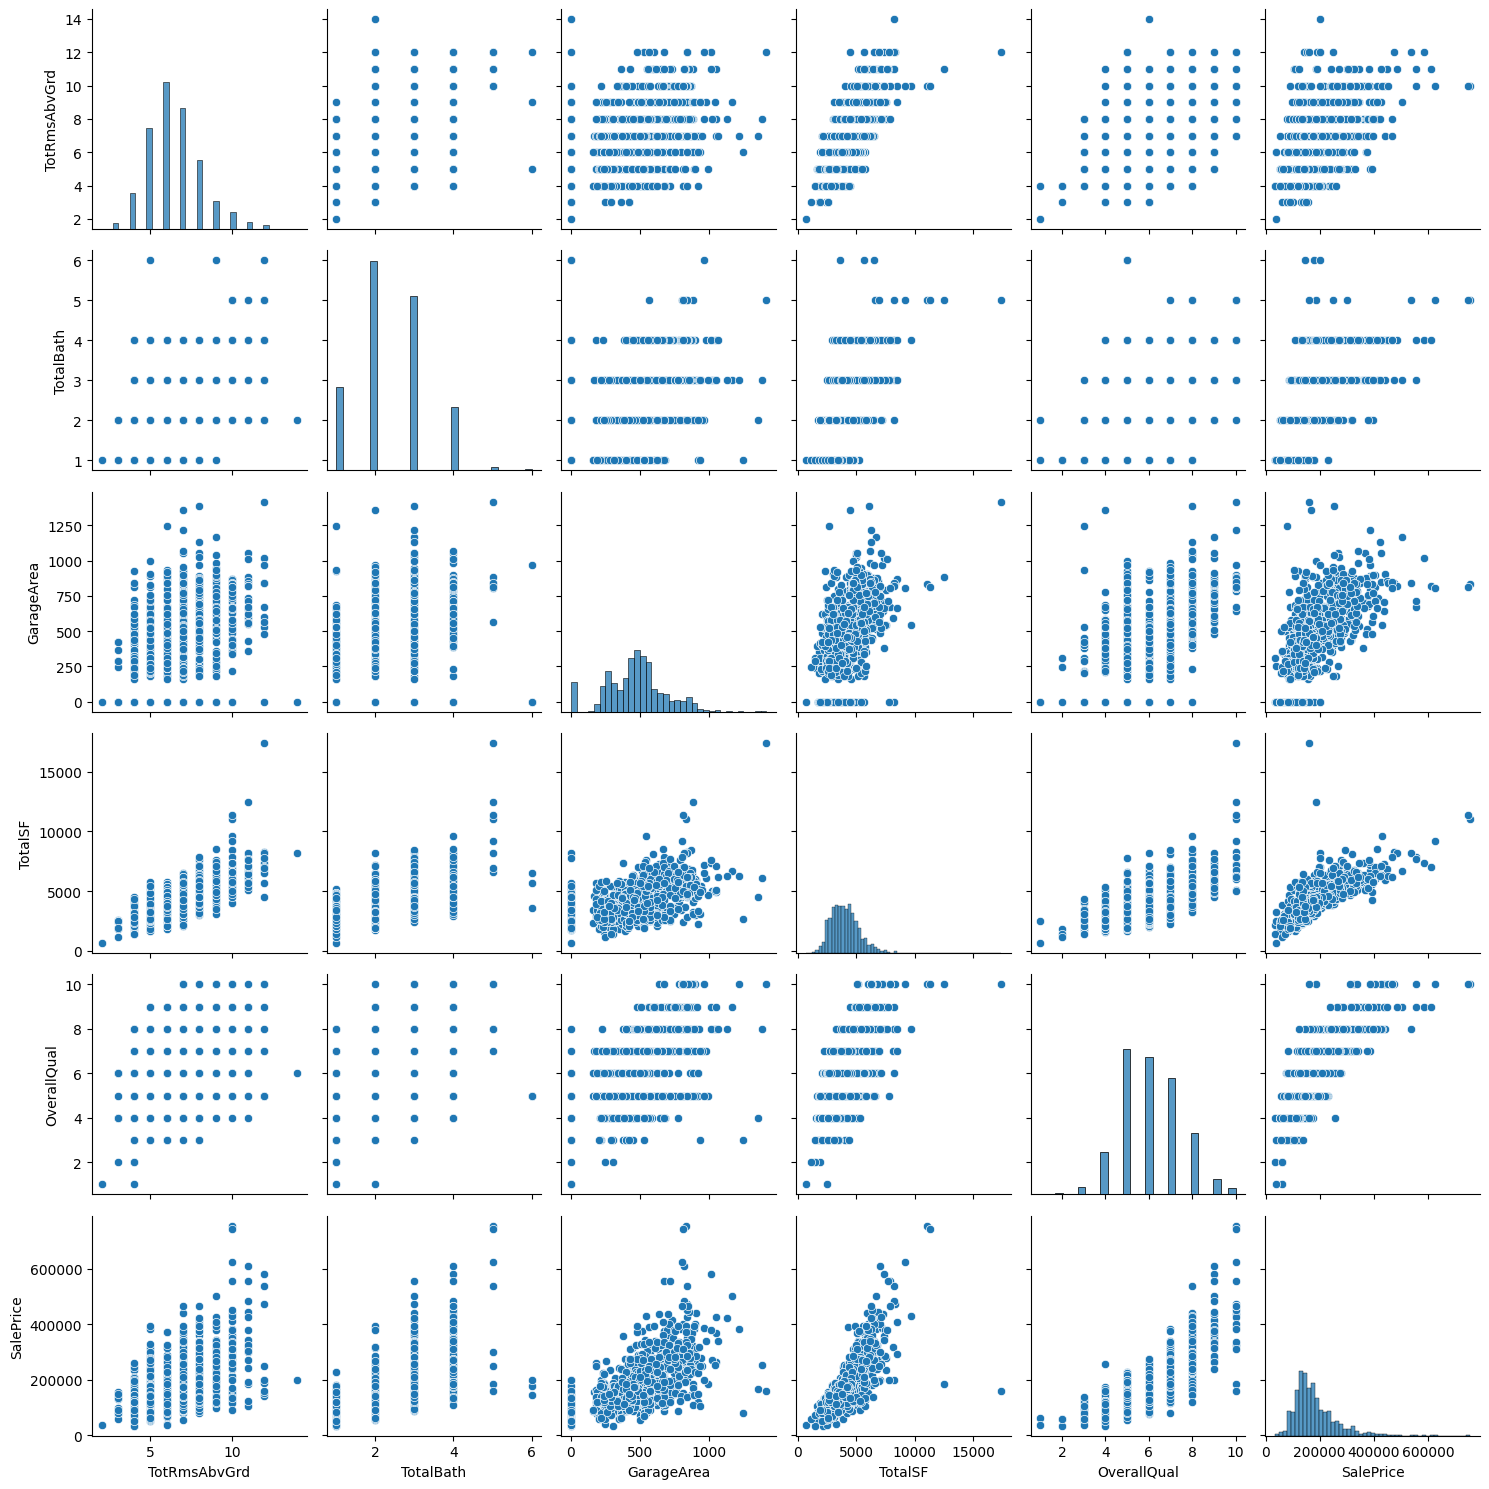

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [20]:
corr_matrix = train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.773909
GarageArea      0.623431
TotalBath       0.613005
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

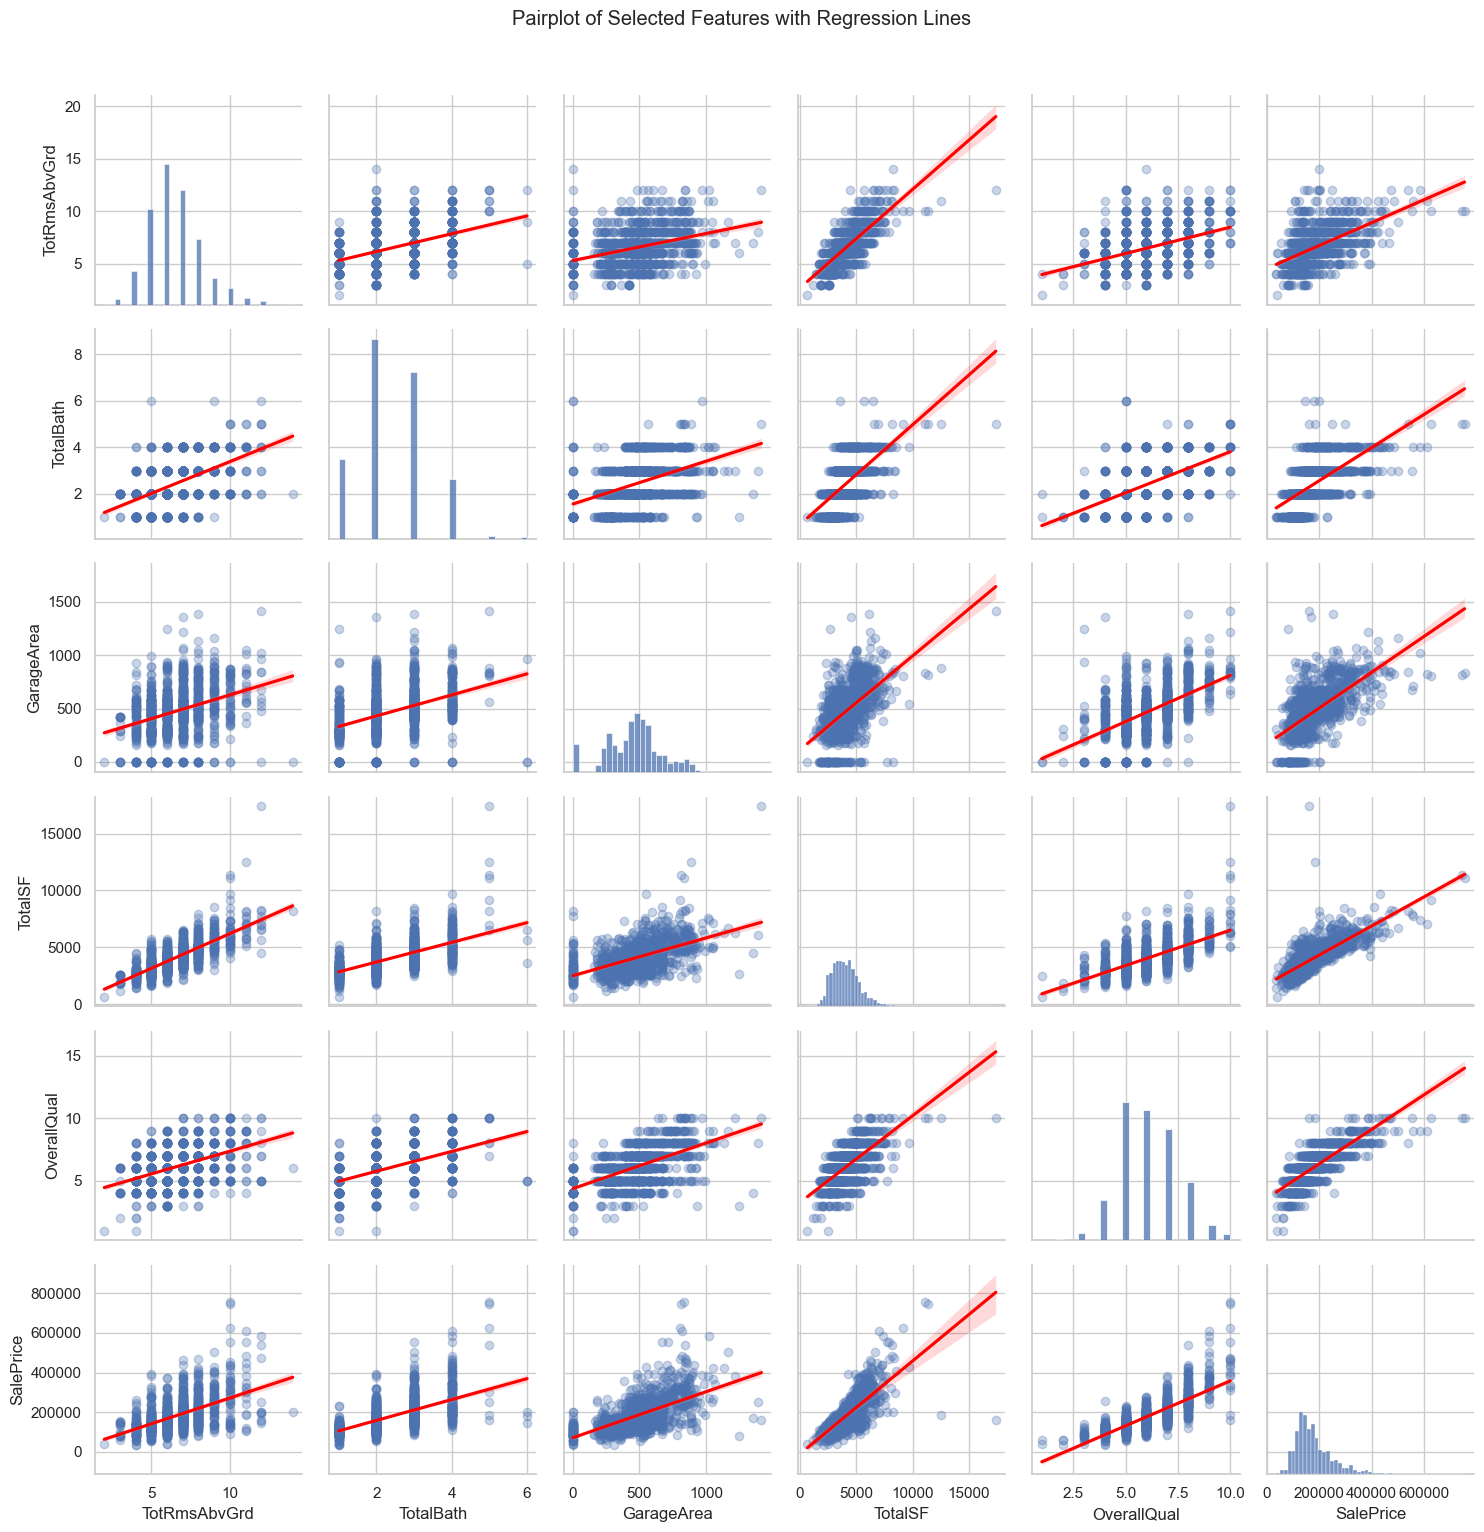

In [53]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create pairplot with regression lines
pairplot = sns.pairplot(train_df[selected_features], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha':0.3}})
pairplot.fig.suptitle("Pairplot of Selected Features with Regression Lines", y=1.02)

# Adjust the layout to fit the title
plt.tight_layout()

# Display the plot
plt.show()

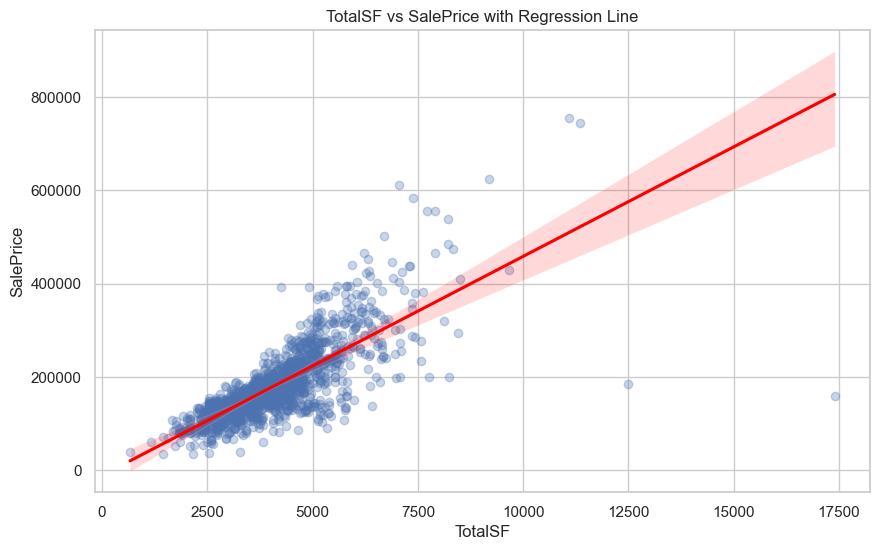

In [54]:
# Scatter plot with regression line for 'TotalSF' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalSF', y='SalePrice', data=train_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('TotalSF vs SalePrice with Regression Line')
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.show()

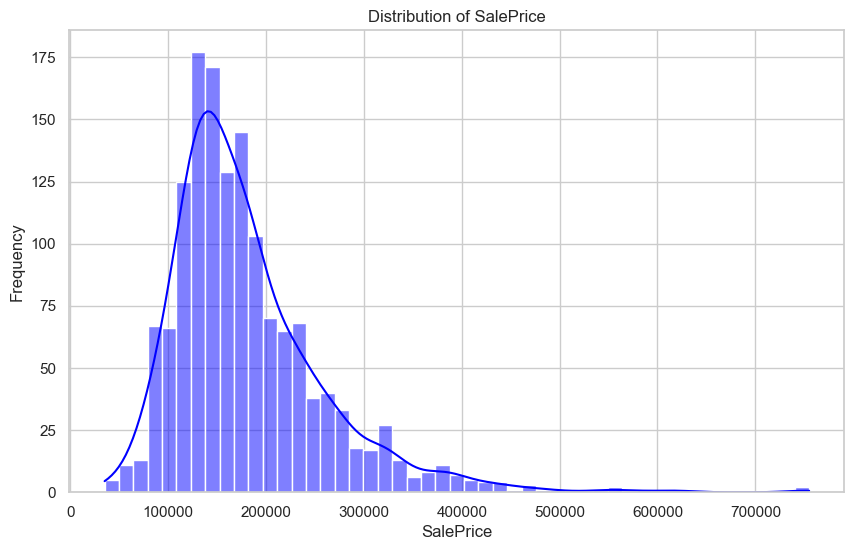

In [55]:
# Distribution plot for 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25564\2414037579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, palette='viridis')


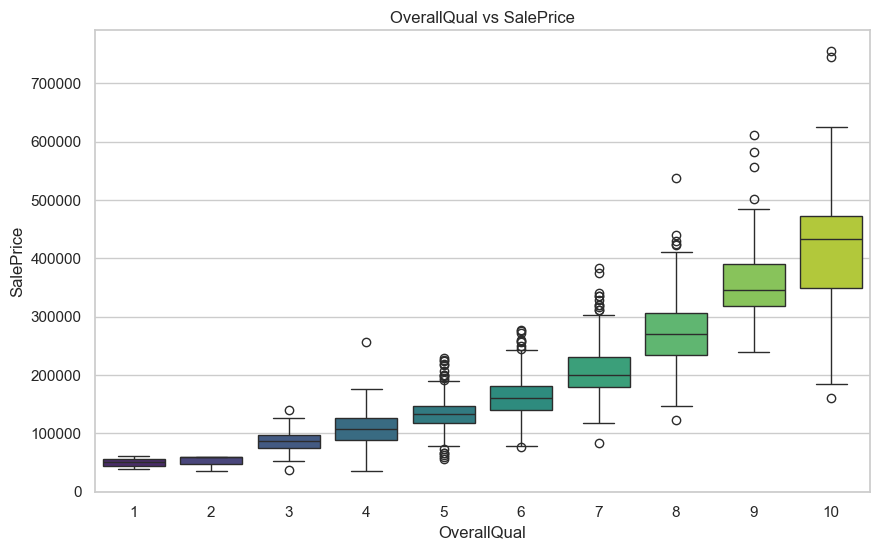

In [56]:
# Box plot for 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df, palette='viridis')
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25564\625238149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='OverallQual', y='SalePrice', data=train_df, palette='viridis')


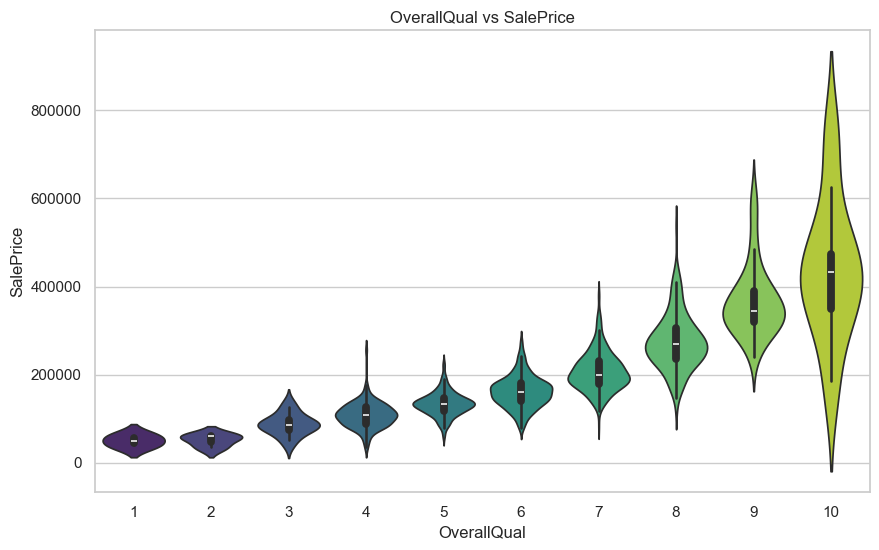

In [57]:
# Violin plot for 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.violinplot(x='OverallQual', y='SalePrice', data=train_df, palette='viridis')
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

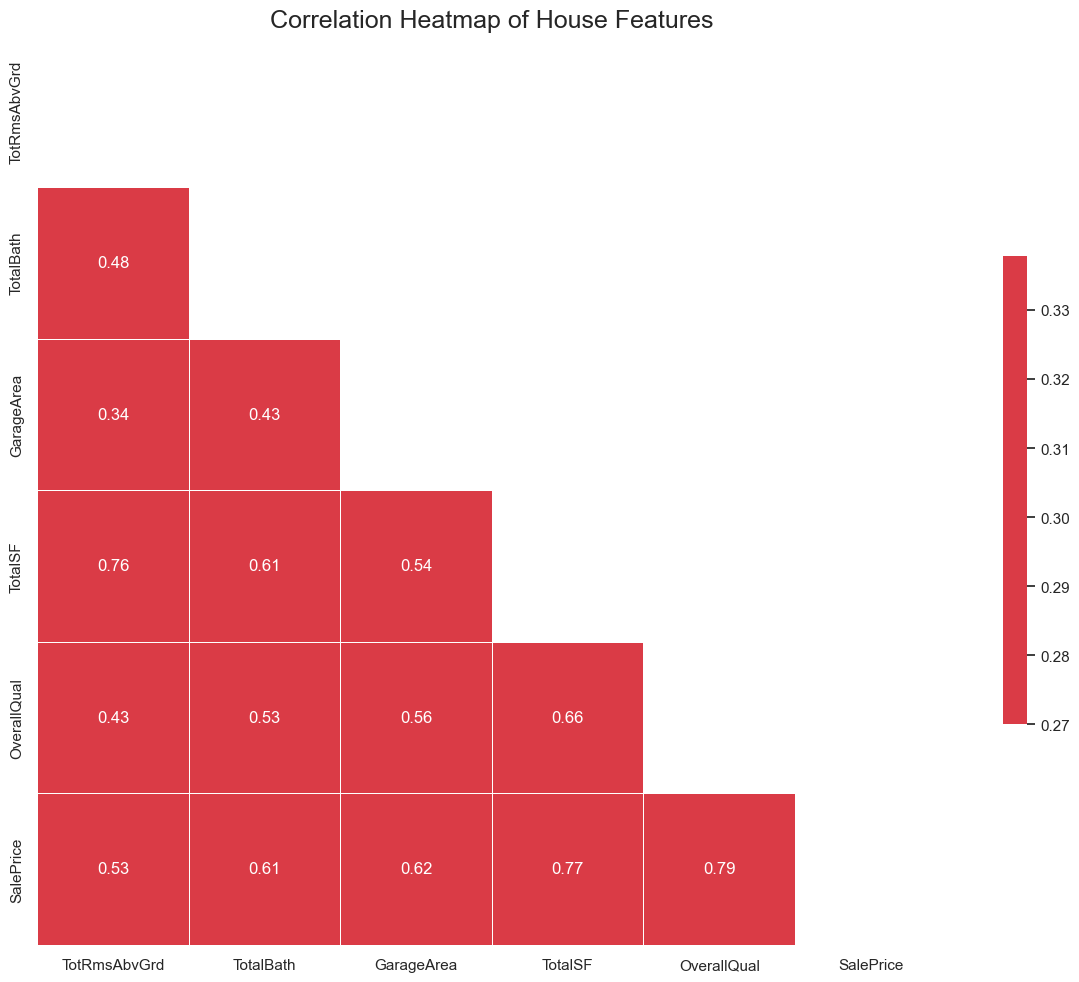

In [52]:
# Set the style for the plot
sns.set(style="white")

# Create a mask for the upper triangle (since the matrix is symmetric)
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(train_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
                      square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

# Add title and adjust layout
plt.title('Correlation Heatmap of House Features', fontsize=18)
plt.tight_layout()

# Show plot
plt.show()

<Axes: >

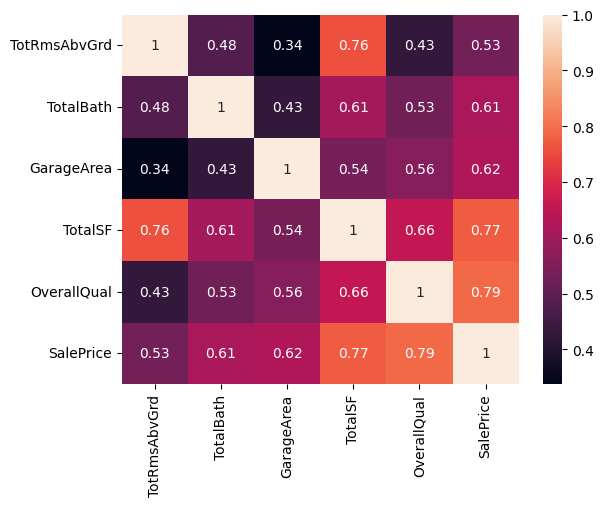

In [21]:
sns.heatmap(train_df.corr(),annot = True)

## Working with Test Dataframe

In [23]:
testdf = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\test.csv")

In [24]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
req_tst = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [26]:
selected_tst = testdf[req_tst]

In [27]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) + 
                                    selected_tst['BsmtHalfBath'].fillna(0) + 
                                    selected_tst['FullBath'].fillna(0) + 
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) + 
                                  selected_tst['1stFlrSF'].fillna(0) + 
                                  selected_tst['2ndFlrSF'].fillna(0) + 
                                  selected_tst['LowQualFinSF'].fillna(0) + 
                                  selected_tst['GrLivArea'].fillna(0))

C:\Users\DELL\AppData\Local\Temp\ipykernel_25564\771691818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
C:\Users\DELL\AppData\Local\Temp\ipykernel_25564\771691818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [28]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,2.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,3.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,3.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,2.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,2.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2.0,2852.0


In [29]:
test_df_unproc = selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]

In [30]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [31]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [32]:
x_test = my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)

In [33]:
x_test

array([[-0.96456591, -1.57881784,  1.2024646 , -1.10333489, -0.82044456],
       [-0.34690528, -0.48377079, -0.77853123, -0.09910341, -0.08893368],
       [-0.34690528,  0.61127627,  0.02713693,  0.05309923, -0.82044456],
       ...,
       [ 0.27075534, -0.48377079,  0.47262403, -0.34002719, -0.82044456],
       [-0.34690528, -0.48377079, -2.25716927, -0.96719384, -0.82044456],
       [ 1.50607659,  0.61127627,  0.82332664,  0.67261751,  0.64257719]])

## Model Selection

In [34]:
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
y_train_pred = model.predict(X_train)

In [36]:
y_train_pred[:5]

array([147520.5 , 171345.  ,  91275.  , 168376.37, 142491.  ])

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [38]:
proc_data = my_pipeline.transform(some_data)

In [39]:
model.predict(proc_data)

array([147520.5 , 171345.  ,  91275.  , 168376.37, 142491.  ])

In [40]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [41]:
train_mse = mean_squared_error(Y_train,y_train_pred)

In [42]:
train_rmse = np.sqrt(train_mse)

In [43]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 181701739.73, Training RMSE: 13479.68


## Cross - Validation

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv = 200)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([ 22289.85684066,  14758.06771046,  25227.1800983 ,  12388.88675351,
        46924.20835692,  13594.76065982,  19633.36549496,  12198.75848569,
         9590.09615634,  51066.80531414,  36824.88343801,  29712.61062243,
        13954.79907194,  10795.87120013,  18160.91647031,  20824.7213415 ,
        17761.70597674,  35252.00751483,  36452.57648881,  23702.62542976,
        25808.20023   ,  17607.4444505 ,  18059.93724453,  27687.64444552,
        20544.17981808,  18228.94366267,  41401.79000659,  37985.07619443,
       169732.62816218,  50451.61026415,  23146.56266643,  30618.59465664,
        20576.39835481,  30829.55299302,  46953.49994655,  13649.31980048,
        23712.77949635,  29336.65697992,  18438.64119534,  31734.74525411,
        18058.32633252,  31851.09867572,  27656.49277159,  36575.9373472 ,
        36250.32015896,  27528.53307852,  28295.42642579,  43447.83575402,
        22176.50154122,  25078.18049775,  21802.68841577,  52089.98375183,
        39905.83322786,  

In [58]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [59]:
print_scores(rmse_scores)

Scores: [ 22289.85684066  14758.06771046  25227.1800983   12388.88675351
  46924.20835692  13594.76065982  19633.36549496  12198.75848569
   9590.09615634  51066.80531414  36824.88343801  29712.61062243
  13954.79907194  10795.87120013  18160.91647031  20824.7213415
  17761.70597674  35252.00751483  36452.57648881  23702.62542976
  25808.20023     17607.4444505   18059.93724453  27687.64444552
  20544.17981808  18228.94366267  41401.79000659  37985.07619443
 169732.62816218  50451.61026415  23146.56266643  30618.59465664
  20576.39835481  30829.55299302  46953.49994655  13649.31980048
  23712.77949635  29336.65697992  18438.64119534  31734.74525411
  18058.32633252  31851.09867572  27656.49277159  36575.9373472
  36250.32015896  27528.53307852  28295.42642579  43447.83575402
  22176.50154122  25078.18049775  21802.68841577  52089.98375183
  39905.83322786  38515.66522444  21959.5455717   28322.3210573
  10504.66441778  26584.91661663  27786.59893025  31236.13668027
 196537.77383662  13

In [60]:
y_pred=model.predict(x_test)

In [61]:
y_pred

array([127039.86, 155317.32, 141539.  , ..., 137437.  , 108228.25,
       238419.05])

In [67]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\sample_submission.csv",index=False)

## Model Prediction & Prepare Submission File

In [69]:
# Define features and target variable
X_train = train_df[['TotalSF', 'TotRmsAbvGrd', 'TotalBath']]
Y_train = train_df['SalePrice']
X_test = test_df[['TotalSF', 'TotRmsAbvGrd', 'TotalBath']]

# Display first few rows of features
X_train.head()

,TotalSF,TotRmsAbvGrd,TotalBath
0,4276,8,4
1,3786,6,3
2,4492,6,4
3,4190,7,2
4,5541,9,4


In [70]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Display model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [   44.65654114 -6605.59255952 19775.71731632]
Intercept: -6667.941547541966


In [71]:
# Cross-validation
scores = cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=200)
rmse_scores = np.sqrt(-scores)

# Function to print cross-validation scores
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

# Print cross-validation scores
print_scores(rmse_scores)

Scores: [ 38540.02133579  52201.20324087  23608.04871555  44103.69549294
  35559.71986984  34315.26080379  44064.48526837  45280.05437252
  50104.09856871  36843.49959883  25675.89541004  54263.21358989
  24259.38911153  36679.79457454  41217.08355416  17954.05297351
  22416.31984447  32368.70209324  60101.74195958  35600.07457811
  48348.47758979  24193.78888368  82425.42352194  57018.673902
  67140.18702888  23286.58048602  19219.42309161  41062.61901127
  45264.11683262  41291.43344932  36722.25519598  25240.48805245
  19459.93467989  33676.64698694  60426.0991546   29448.47674635
  28330.18759298  21036.31713517  48006.3016923   38012.20643622
  43020.35106702  39470.03432991  46499.926046    58596.20031457
  26504.4098754   23471.69297571  24975.89706391  62584.36942056
  49739.52883571  31618.16691976  34246.47871195  48496.73080328
  23437.76450385  22604.95711844  20758.79557297  84445.3725585
  33885.47207238  31806.17779303  20693.70663437  68437.81116941
  59440.61014599  31

In [72]:
# Model prediction
y_pred = model.predict(X_test)

# Display predictions
y_pred[:10]  # Display first 10 predictions

array([ 99491.40397012, 171295.56723912, 199957.9362416 , 191030.20354298,
       171336.64825158, 188306.15453366, 171199.12374971, 172497.73897134,
       197453.59440928, 124622.33069414])

In [73]:
# Create DataFrame for predictions
pred = pd.DataFrame(y_pred, columns=['SalePrice'])

# Read sample submission file
sub_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\sample_submission.csv")

# Concatenate Id and predictions
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']

# Save to CSV file
datasets.to_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\sample_submission.csv", index=False)

print("Submission file created successfully!")

Submission file created successfully!


## Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [77]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, Y_train)

# Display best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))


Best parameters: {'regressor__fit_intercept': True}
Best score: 48543.29175222499


## Feature Importance

In [78]:
# Feature importance for linear regression is given by the coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.coef_
})

# Display feature importance
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,TotalBath,19775.717316
0,TotalSF,44.656541
1,TotRmsAbvGrd,-6605.592560
